# Question # 2

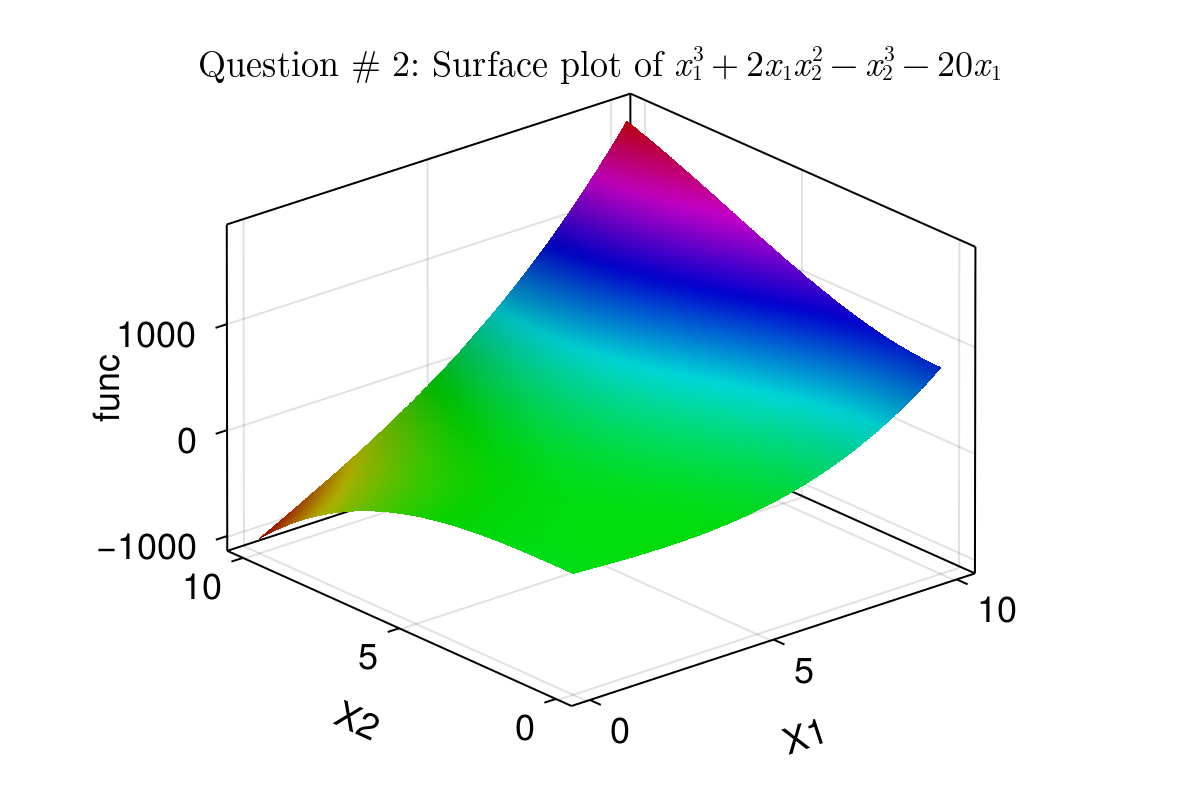

In [248]:
using Makie, CairoMakie # Import packages of Makie, CairoMakie to plot in Julia
using LaTeXStrings # Use this package to use Latex string for label
function my_func(x1, x2) # Define the function: f
    f = x1^ 3 + 2 * x1 * x2^2 - x2^ 3 - 20 * x1
end
# Intilization
X1 = range(0, 10, 100) # range of X1 coordinates
X2 = range(0, 10, 100) # range of X2 coordinates
func = [my_func(x1, x2) for x1 in X1, x2 in X2] # Evaluations of the function f
# ============SURFACES====================
fig = Figure(size = (600, 400),fontsize=18)
ax = Axis3(fig[1, 1], title = L"Question # 2: Surface plot of $x_{1}^3 + 2x_1x_2^2 - x_2^3 - 20x_1$", xlabel="X1", ylabel="X2", zlabel="func")
surface!(ax, X1, X2, func, colormap=:hsv); fig

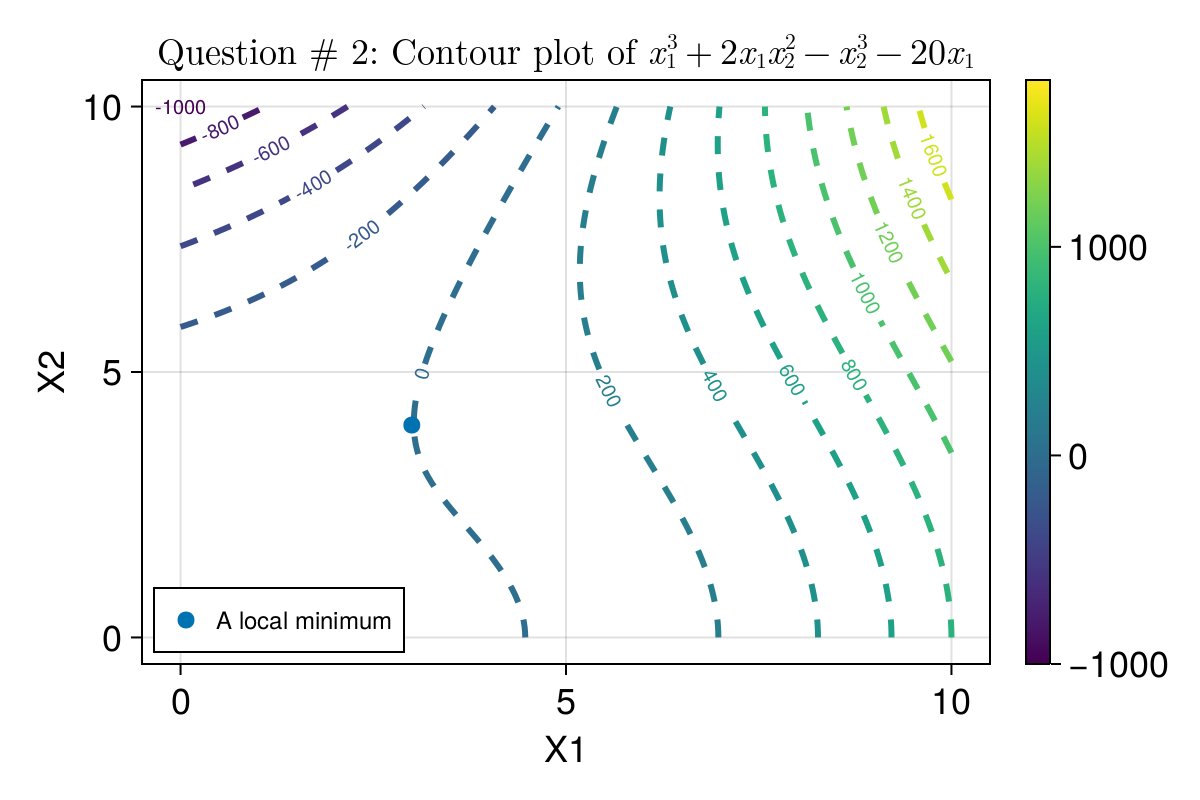

In [250]:
# =============Start the Contour plots===============
fig = Figure(size = (600, 400),fontsize=18)
# Define the title, labels
ax = Axis(fig[1, 1], title = L"Question # 2: Contour plot of $x_{1}^3 + 2x_1x_2^2 - x_2^3 - 20x_1$", xlabel="X1", ylabel="X2") 
# Show the contour plot
Makie.contour!(ax,X1, X2, func, linewidth = 3, linestyle = :dash , levels = range(minimum(func),maximum(func), 15),labels = true)
Makie.scatter!(ax,3, 4, markersize = 12, label = "A local minimum") # Plot the local minimum
Makie.Colorbar(fig[1, 2] , colorrange= (minimum(func), maximum(func))) # Add colorbar
axislegend(position=:lb; labelsize=12); fig

# Question #4

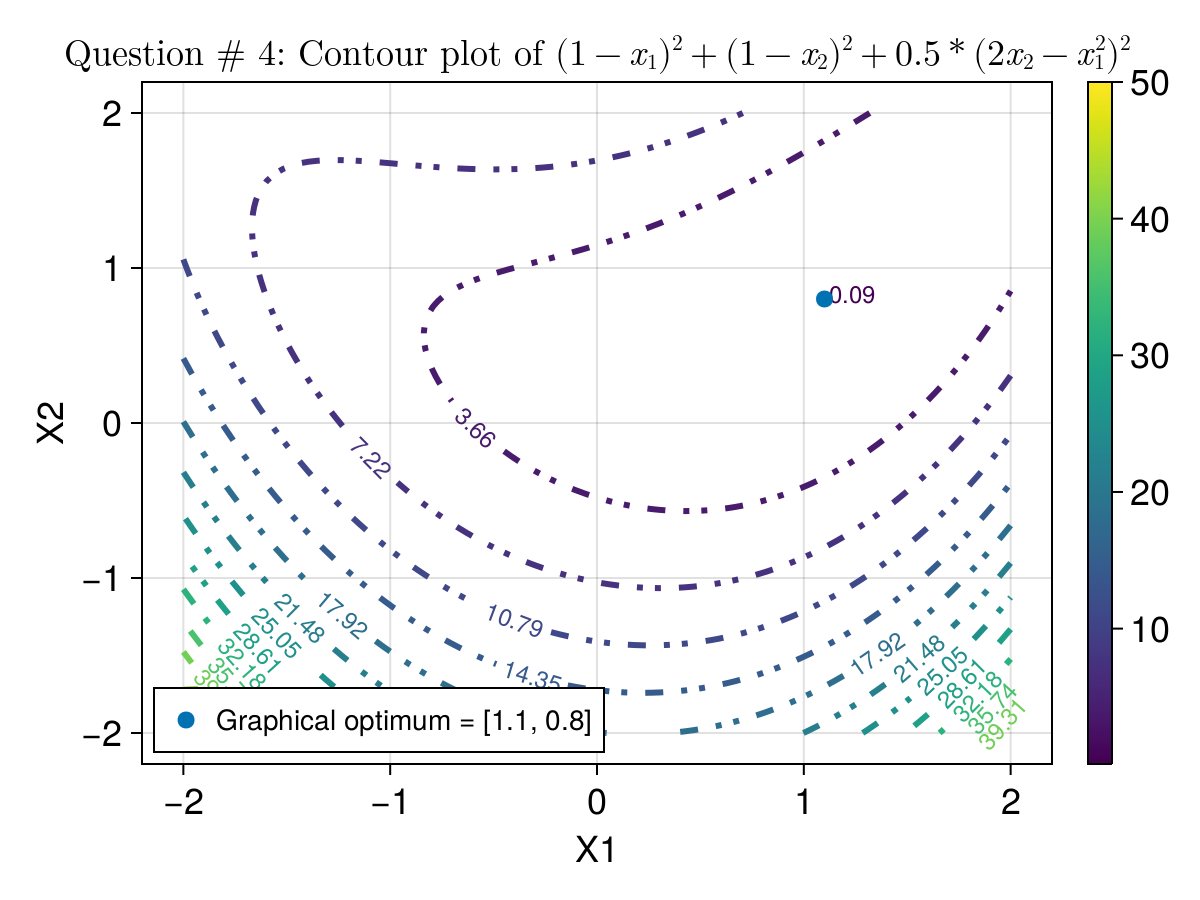

In [238]:
# =============Start the Contour plots===============
# Define the function: f
function my_func_4(x1, x2)
    f = (1 - x1)^2 + (1 - x2)^2 + (1/2)*(2*x2 - x1^2)^2
end
# Intilization
X1 = range(-2, 2, 100) # range of X1 coordinates
X2 = range(-2, 2, 100) # range of X2 coordinates
func_4 = [my_func_4(x1, x2) for x1 in X1, x2 in X2] # Evaluations of the function f
# Define a figure
fig = Figure(fontsize=18)
# Define the title, labels
ax = Axis(fig[1, 1], title = L"Question # 4: Contour plot of $(1 - x_{1})^2 + (1 - x_{2})^2 + 0.5*(2x_{2} - x_{1}^2)^2$", xlabel="X1", ylabel="X2") 
# Show the contour plot
Makie.contour!(ax,X1, X2, func_4, linewidth = 3, linestyle = :dashdotdot, labelsize = 12 , levels = range(minimum(func_4), maximum(func_4), 15),labels = true)
Makie.scatter!(ax, 1.1, 0.8, markersize = 12, label = "Graphical optimum = [1.1, 0.8]") # Plot Graphical solution
# Show the colorbar
Makie.Colorbar(fig[1, 2] , colorrange= (minimum(func_4), maximum(func_4))) # Add colorbar
axislegend(position=:lb; labelsize=14) # Position of legend
fig # Show figure


In [239]:
# SOURCE: https://github.com/JuliaOpt/NLopt.jl/blob/master/test/tutorial.jl
using NLopt # Optimization package in Julia
count = 0 # keep track of # function evaluations
# Objective function from HW4
function myfunc(x::Vector, grad::Vector)
    if length(grad) > 0
        grad[1] = -2*(1 - x[1])  -(2*x[1])*(2*x[2] - x[1]^2)
        grad[2] = -2*(1 - x[2]) + (2)*(2*x[2] - x[1]^2)
    end

    global count
    count::Int += 1
    cost = (1 - x[1])^2 + (1 - x[2])^2 + (0.5)*(2*x[2] - x[1]^2)^2
    println("nfev = ", count, ", f = ", round(cost,digits =3), ", x = ",round.(x,digits =3) )
    return cost
end
# Intilization of optimization problems
opt = Opt(:LD_MMA, 2)
opt.xtol_rel = 1e-4
opt.min_objective = myfunc
# test algorithm-parameter API
opt.params["verbosity"] = 0
opt.params["inner_maxeval"] = 10
opt.params["dual_alg"] = NLopt.LD_MMA
opt.params == Dict("verbosity"=>0, "inner_maxeval"=>10, "dual_alg"=>Int(NLopt.LD_MMA))
x0 = [0.0, 0.0]
(minf,minx,ret) = optimize(opt, x0)
print("Numbers of iteration (nit) is: ", count, "  \n")
print("The optimal solution is: x = ", round.(minx,digits =3), "\n")
print("The value of f = ", round(minf,digits =3), "\n")

nfev = 1, f = 2.0, x = [0.0, 0.0]
nfev = 2, f = 0.781, x = [0.5, 0.5]
nfev = 3, f = 3.272, x = [1.288, -0.142]
nfev = 4, f = 0.711, x = [0.978, 0.232]
nfev = 5, f = 0.346, x = [0.802, 0.556]
nfev = 6, f = 0.227, x = [0.948, 0.547]
nfev = 7, f = 0.167, x = [1.406, 1.021]
nfev = 8, f = 0.189, x = [1.105, 0.901]
nfev = 9, f = 0.131, x = [1.275, 0.978]
nfev = 10, f = 0.122, x = [1.327, 0.878]
nfev = 11, f = 0.101, x = [1.271, 0.901]
nfev = 12, f = 0.098, x = [1.265, 0.887]
nfev = 13, f = 0.097, x = [1.168, 0.768]
nfev = 14, f = 0.092, x = [1.203, 0.826]
nfev = 15, f = 0.1, x = [1.241, 0.799]
nfev = 16, f = 0.092, x = [1.209, 0.821]
nfev = 17, f = 0.092, x = [1.215, 0.821]
nfev = 18, f = 0.092, x = [1.211, 0.821]
nfev = 19, f = 0.092, x = [1.212, 0.826]
nfev = 20, f = 0.092, x = [1.211, 0.822]
nfev = 21, f = 0.093, x = [1.23, 0.822]
nfev = 22, f = 0.092, x = [1.213, 0.822]
nfev = 23, f = 0.092, x = [1.212, 0.824]
nfev = 24, f = 0.092, x = [1.213, 0.823]
nfev = 25, f = 0.092, x = [1.214, 0.8

# Question #5

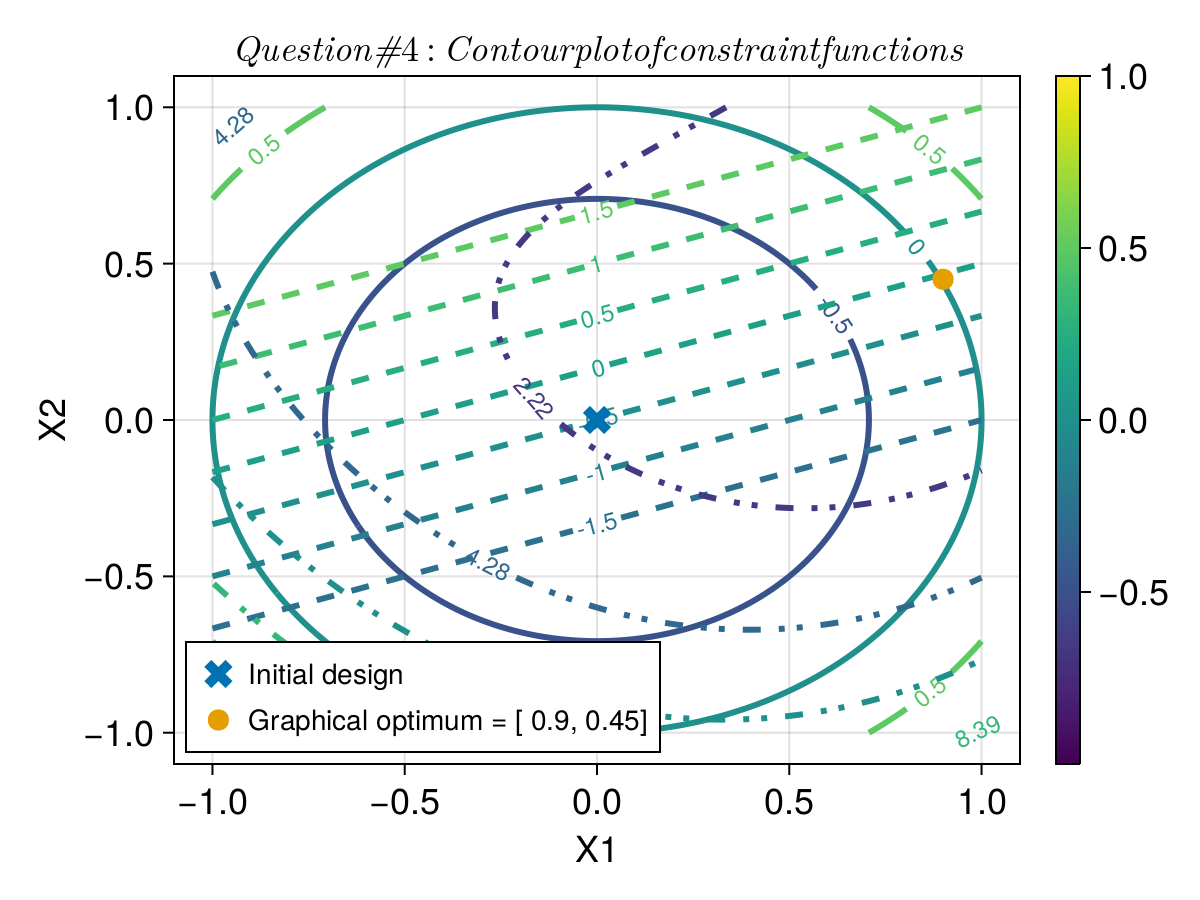

In [240]:
# =============PLOT THE FEASIBLE REGION===============
# Define the constraint function 1
function my_const_1(x1, x2)
    f = x1^2 + x2^2 -1
    return f
end
# Define the constraint function 2
function my_const_2(x1, x2)
    f = -0.5 + 3*x2 - x1
    return f
end
# Intilization
X1 = range(-1,1, 400) # range of X1 coordinates
X2 = range(-1,1, 400) # range of X2 coordinates
const_1 = [my_const_1(x1, x2) for x1 in X1, x2 in X2] # Evaluations of the function f
const_2 = [my_const_2(x1, x2) for x1 in X1, x2 in X2] # Evaluations of the function f
func_4 = [my_func_4(x1, x2) for x1 in X1, x2 in X2] # Evaluations of the function f
# Define a figure
fig = Figure(fontsize=18)
# Define the title, labels
ax = Axis(fig[1, 1], title = L"Question # 4: Contour plot of constraint functions", 
    xlabel="X1", ylabel="X2") 
# Show the contour plot
Makie.contour!(ax,X1, X2, const_1, linewidth = 3, levels = -1.5:0.5:1.5,labelsize = 12,labels = true)
Makie.contour!(ax,X1, X2, const_2, linewidth = 3, linestyle = :dash, levels = -1.5:0.5:1.5,labelsize = 12,labels = true)
Makie.contour!(ax,X1, X2, func_4, linewidth = 3, linestyle = :dashdotdot, levels = 5, labelsize = 12,labels = true)
Makie.scatter!(ax, 0, 0, markersize = 20,marker  = :xcross, label = "Initial design") # Initial design
Makie.scatter!(ax, 0.9, 0.45, markersize = 15,label = "Graphical optimum = [ 0.9, 0.45]") # Graphical minimum
# Show the colorbar
Makie.Colorbar(fig[1, 2], colorrange= (minimum(const_1), maximum(const_1)))
axislegend(position=:lb; labelsize=14) # Position of legend
fig # Show figure


In [241]:
# SOURCE: https://github.com/JuliaOpt/NLopt.jl/blob/master/test/tutorial.jl
using NLopt
count = 0 # keep track of # function evaluations
# Objective function from HW5
function myfunc(x::Vector, grad::Vector)
    if length(grad) > 0
        grad[1] = -2*(1 - x[1])  -(2*x[1])*(2*x[2] - x[1]^2)
        grad[2] = -2*(1 - x[2]) + (2)*(2*x[2] - x[1]^2)
    end

    global count
    count::Int += 1
    cost = (1 - x[1])^2 + (1 - x[2])^2 + (1/2)*(2*x[2] - x[1]^2)^2
    println("nfev = ", count, ", f = ", round(cost,digits =3), ", x = ",round.(x,digits =3) )
    return cost
end
# Constraint function 1
function myconstraint_1(x::Vector, grad::Vector)
    if length(grad) > 0
        grad[1] = 2*x[1]
        grad[2] = 2*x[2]
    end
    return (x[1]^2 +  x[2]^2 -1)
end
# Constraint function 2
function myconstraint_2(x::Vector, grad::Vector)
    if length(grad) > 0
        grad[1] = -1
        grad[2] = 3
    end
    return -0.5 + 3*x[2] - x[1]
end

# Intilization of optimization problems
opt = Opt(:LD_MMA, 2)
opt.lower_bounds = [0.0, 0.0] # Lower bounds of design variables
opt.xtol_rel = 1e-4
opt.min_objective = myfunc
opt.inequality_constraint = (x,g) -> myconstraint_1(x,g) # add inequality constraint 1
opt.inequality_constraint = (x,g) -> myconstraint_2(x,g) # add inequality constraint 2


# test algorithm-parameter API
opt.params["verbosity"] = 0
opt.params["inner_maxeval"] = 10
opt.params["dual_alg"] = NLopt.LD_MMA
opt.params == Dict("verbosity"=>0, "inner_maxeval"=>10, "dual_alg"=>Int(NLopt.LD_MMA))

x0 = [0.0, 0.0]
(minf,minx,ret) = optimize(opt, x0)
print("Numbers of iteration (nit) is: ", count, "  \n")
print("The optimal solution is: x = ", round.(minx,digits =3), "\n")
print("The value of f = ", round(minf,digits =3), "\n")


nfev = 1, f = 2.0, x = [0.0, 0.0]
nfev = 2, f = 0.95, x = [0.481, 0.18]
nfev = 3, f = 0.451, x = [0.83, 0.35]
nfev = 4, f = 0.319, x = [0.891, 0.451]
nfev = 5, f = 0.312, x = [0.887, 0.462]
nfev = 6, f = 0.312, x = [0.887, 0.462]
nfev = 7, f = 0.312, x = [0.887, 0.462]
nfev = 8, f = 0.312, x = [0.887, 0.462]
nfev = 9, f = 0.312, x = [0.887, 0.462]
Numbers of iteration (nit) is: 9  
The optimal solution is: x = [0.887, 0.462]
The value of f = 0.312


In [242]:
# Check constriants are active or inactive
const_1 = my_const_1(minx[1],minx[2])
const_2 = my_const_2(minx[1],minx[2])
print("The value of const_1 = ", round(const_1,digits =6), "\n")
print("The value of const_2 = ", round(const_1,digits =6), "\n")

The value of const_1 = -0.0
The value of const_2 = -0.0


In [243]:
# Different initial designs
count = 0 # keep track of # function evaluations
x0 = [0.2, 0.1]
(minf,minx,ret) = optimize(opt, x0)
print("Numbers of iteration (nit) is: ", count, "  \n")
print("The optimal solution is: x = ", round.(minx,digits =3), "\n")
print("The value of f = ", round(minf,digits =3), "\n")

nfev = 1, f = 1.463, x = [0.2, 0.1]
nfev = 2, f = 0.67, x = [0.657, 0.259]
nfev = 3, f = 0.352, x = [0.89, 0.418]
nfev = 4, f = 0.312, x = [0.888, 0.461]
nfev = 5, f = 0.312, x = [0.888, 0.461]
nfev = 6, f = 0.312, x = [0.887, 0.462]
nfev = 7, f = 0.312, x = [0.887, 0.462]
nfev = 8, f = 0.312, x = [0.887, 0.462]
Numbers of iteration (nit) is: 8  
The optimal solution is: x = [0.887, 0.462]
The value of f = 0.312
